----

<div align="center">
    

 
 # Welcome to the teaspoon (topological signal processing) demo!
    
<br />
 
 <img src="figures/teaspoon.png" style="width:300px;">
</div>


---

## 1. Getting Started

### 1.1 Documentation

Source code:    https://github.com/lizliz/teaspoon

Documentation:  http://elizabethmunch.com/code/teaspoon/index.html

### 1.2 Installing teaspoon

```
pip install teaspoon
```

Pypi: https://pypi.org/project/teaspoon/





----

----

## 2. [Dynamical Systems Library Module](http://elizabethmunch.com/code/teaspoon/DynSysLib.html)
<br />
<div align="center"> 
 <img src="figures/DSL_fig.png" style="width:300px;">
</div>


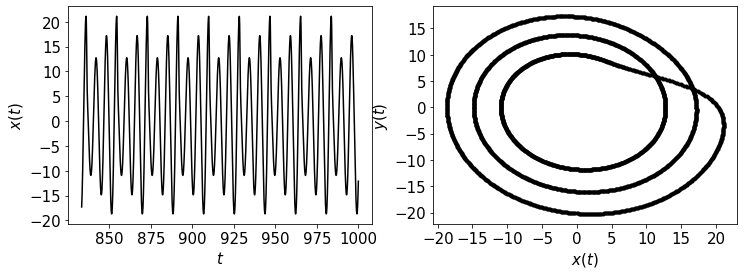

In [9]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL

system = 'rossler'
dynamic_state = 'periodic'
t, ts = DSL.DynamicSystems(system, dynamic_state)

TextSize = 15
plt.figure(figsize = (12,4))
gs = gridspec.GridSpec(1,2)

ax = plt.subplot(gs[0, 0])
plt.xticks(size = TextSize)
plt.yticks(size = TextSize)
plt.ylabel(r'$x(t)$', size = TextSize)
plt.xlabel(r'$t$', size = TextSize)
plt.plot(t,ts[0], 'k')

ax = plt.subplot(gs[0, 1])
plt.plot(ts[0], ts[1],'k.')
plt.plot(ts[0], ts[1],'k', alpha = 0.25)
plt.xticks(size = TextSize)
plt.yticks(size = TextSize)
plt.xlabel(r'$x(t)$', size = TextSize)
plt.ylabel(r'$y(t)$', size = TextSize)

plt.show()

Result


----------------------------------------User Guide----------------------------------------------

This code outputs a time array t and a list time series for each variable of the dynamic system.
The user is only required to enter the system (see list below) as a string and 
the dynamic state as either periodic or chaotic as a string.

The user also has the optional inputs as the time series length in seconds (L), 
the sampling rate (fs), and the sample size (SampleSize).
If the user does not supply these values, they are defaulted to preset values.

Other optional inputs are parameters and InitialConditions. The parameters variable
needs to be entered as a list or array and are the dynamic system parameters.
If the correct number of parameters is not provided it will default to preset parameters.
The InitialConditions variable is also a list or array and is the initial conditions of the system.
The length of the initial conditions also need to match the system being analyzed.

List of

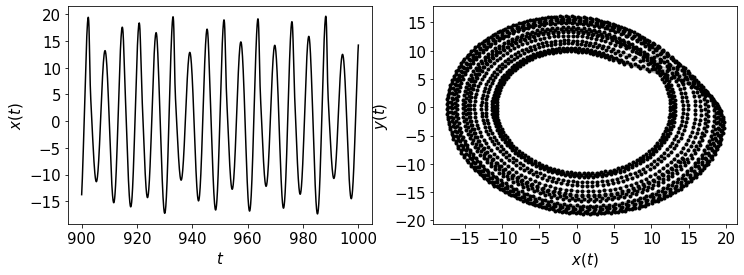

In [10]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL

system = 'rossler'
UserGuide = True
L, fs, SampleSize = 1000, 20, 2000
# the length (in seconds) of the time series, the sample rate, and the sample size of the time series of the simulated system.
parameters = [0.1, 0.2, 13.0] # these are the a, b, and c parameters from the Rossler system model.
InitialConditions = [1.0, 0.0, 0.0] # [x_0, y_0, x_0]
t, ts = DSL.DynamicSystems(system, dynamic_state, L, fs, SampleSize, parameters,  InitialConditions, UserGuide)

TextSize = 15
plt.figure(figsize = (12,4))
gs = gridspec.GridSpec(1,2)

ax = plt.subplot(gs[0, 0])
plt.xticks(size = TextSize)
plt.yticks(size = TextSize)
plt.ylabel(r'$x(t)$', size = TextSize)
plt.xlabel(r'$t$', size = TextSize)
plt.plot(t,ts[0], 'k')

ax = plt.subplot(gs[0, 1])
plt.plot(ts[0], ts[1],'k.')
plt.plot(ts[0], ts[1],'k', alpha = 0.25)
plt.xticks(size = TextSize)
plt.yticks(size = TextSize)
plt.xlabel(r'$x(t)$', size = TextSize)
plt.ylabel(r'$y(t)$', size = TextSize)

plt.show()

result

----

---


## 3. [Parameter Selection Module](http://elizabethmunch.com/code/teaspoon/parameter_selection.html)
<br />
<div align="center"> 
 <img src="figures/PS_fig.png" style="width:300px;">
</div>

### 3.1 Mutual Information

C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\parameter_selection\MI_delay.py:501: RuntimeWarning: divide by zero encountered in log
  I_matrix = Pxy*np.log(Pxy/(Px*Py))
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\parameter_selection\MI_delay.py:501: RuntimeWarning: invalid value encountered in multiply
  I_matrix = Pxy*np.log(Pxy/(Px*Py))


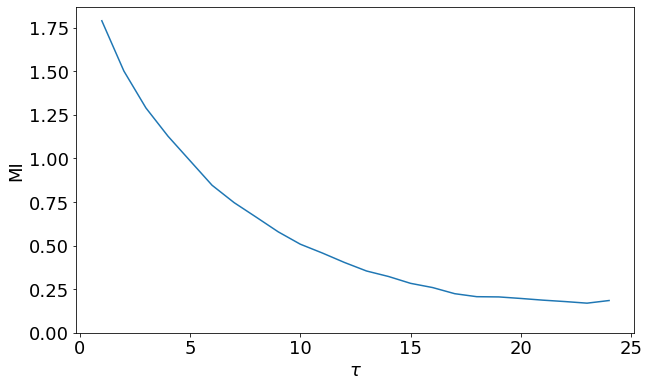

Delay from MI:  23


In [11]:
from teaspoon.parameter_selection.MI_delay import MI_for_delay
import numpy as np

fs = 10
t = np.linspace(0, 100, fs*100)
ts = np.sin(t) + np.sin((1/np.pi)*t)

tau = MI_for_delay(ts, plotting = True, method = 'basic', h_method = 'sturge', k = 2, ranking = True)
print('Delay from MI: ',tau)

### 3.2 False Nearest Neighbors

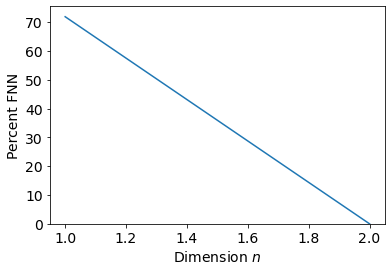

FNN embedding Dimension:  2


In [12]:
from teaspoon.parameter_selection.FNN_n import FNN_n
import numpy as np

fs = 10
t = np.linspace(0, 100, fs*100)
ts = np.sin(t)

tau=15 #embedding delay

perc_FNN, n = FNN_n(ts, tau, plotting = True)
print('FNN embedding Dimension: ',n)

### 3.3 Multi-scale Permutation Entropy

<Figure size 432x288 with 0 Axes>

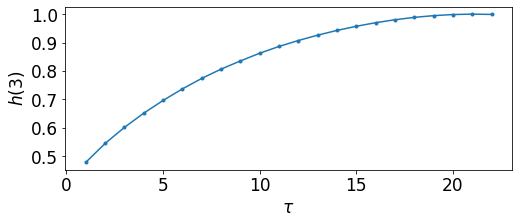

<Figure size 432x288 with 0 Axes>

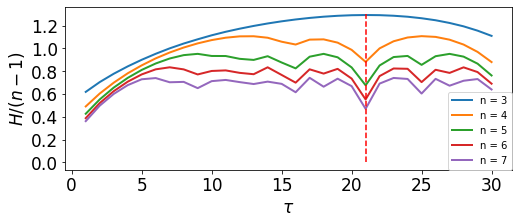

Embedding Delay:       21
Embedding Dimension:   3


In [13]:
import numpy as np
from teaspoon.parameter_selection.MsPE import MsPE_n,  MsPE_tau

t = np.linspace(0, 100, 1000)
ts = np.sin(t)

m_s, m_e, d_s, d_e = 3, 7, 1, 200
#m_s and m_e are the starting and ending dimensions n to search through
#d_e = max delay tau to search through

#plotting option will show you how delay tau or dimension n were selected
tau = int(MsPE_tau(ts, d_e, plotting = True))
n = MsPE_n(ts, tau, m_s, m_e, plotting = True)

print('Embedding Delay:       '+str(tau))
print('Embedding Dimension:   '+str(n))


----
---

## 4. [Information Module](http://elizabethmunch.com/code/teaspoon/information.html)
<br />
<div align="center"> 
 <img src="figures/I_fig.png" style="width:300px;">
</div>

### 4.1 Permutation Entropy

In [14]:
import numpy as np
t = np.linspace(0,100,2000)
ts = np.sin(t)  #generate a simple time series

from teaspoon.SP.information.entropy import PE
h = PE(ts, n = 6, tau = 15, normalize = True)
print('Permutation entropy: ', h)

Permutation entropy:  0.4350397222113192


<Figure size 432x288 with 0 Axes>

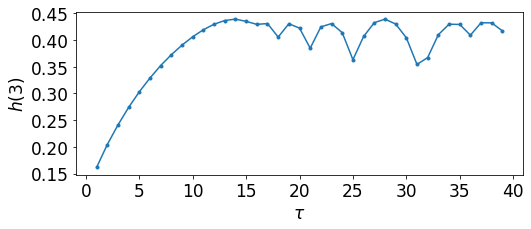

In [15]:
import numpy as np
t = np.linspace(0,100,2000)
ts = np.sin(t)  #generate a simple time series

from teaspoon.SP.information.entropy import MsPE
delays,H = MsPE(ts, n = 6, delay_end = 40, normalize = True)

import matplotlib.pyplot as plt
plt.figure(2)
TextSize = 17
plt.figure(figsize=(8,3))
plt.plot(delays, H, marker = '.')
plt.xticks(size = TextSize)
plt.yticks(size = TextSize)
plt.ylabel(r'$h(3)$', size = TextSize)
plt.xlabel(r'$\tau$', size = TextSize)
plt.show()

### 4.2 Persistent Entropy

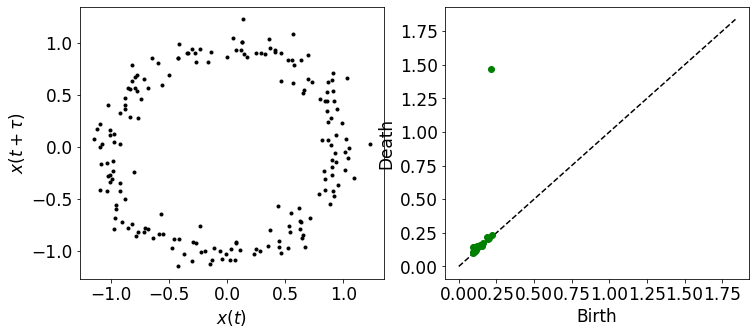

Persistent entropy:  1.6301181160032767


In [16]:
import numpy as np
#generate a simple time series with noise
t = np.linspace(0,20,200)
ts = np.sin(t) +np.random.normal(0,0.1,len(t))

from teaspoon.SP.tsa_tools import takens
#embed the time series into 2 dimension space using takens embedding
embedded_ts = takens(ts, n = 2, tau = 15)

from ripser import ripser
#calculate the rips filtration persistent homology
result = ripser(embedded_ts, maxdim=1)
diagram = result['dgms']

#--------------------Plot embedding and persistence diagram---------------
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, 2)
plt.figure(figsize = (12,5))
TextSize = 17
MS = 4

ax = plt.subplot(gs[0, 0])
plt.yticks( size = TextSize)
plt.xticks(size = TextSize)
plt.xlabel(r'$x(t)$', size = TextSize)
plt.ylabel(r'$x(t+\tau)$', size = TextSize)
plt.plot(embedded_ts.T[0], embedded_ts.T[1], 'k.')

ax = plt.subplot(gs[0, 1])
top = max(diagram[1].T[1])
plt.plot([0,top*1.25],[0,top*1.25],'k--')
plt.yticks( size = TextSize)
plt.xticks(size = TextSize)
plt.xlabel('Birth', size = TextSize)
plt.ylabel('Death', size = TextSize)
plt.plot(diagram[1].T[0],diagram[1].T[1] ,'go', markersize = MS+2)

plt.show()
#-------------------------------------------------------------------------

#get lifetimes (L) as difference between birth (B) and death (D) times
B, D = diagram[1].T[0], diagram[1].T[1]
L = D - B

from teaspoon.SP.information.entropy import PersistentEntropy
h = PersistentEntropy(lifetimes = L)

print('Persistent entropy: ', h)

----
---

## 5. [Persistent Homology of Complex Networks Module](http://elizabethmunch.com/code/teaspoon/PHN.html)
<br />
<div align="center"> 
 <img src="figures/CN_fig.png" style="width:300px;">
</div>

### [Persistent Homology of Ordinal Partition Networks](http://elizabethmunch.com/code/teaspoon/network.html)

### Periodic Example

1-D Persistent Homology (loops):  [[1. 9.]
 [1. 2.]
 [1. 5.]]


<Figure size 432x288 with 0 Axes>

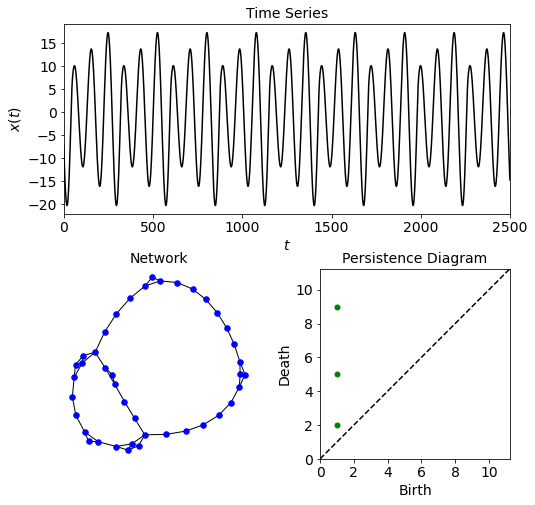

In [17]:
#import needed packages
import numpy as np
from teaspoon.SP.network import ordinal_partition_graph
from teaspoon.TDA.PHN import PH_network
from teaspoon.SP.network_tools import make_network
from teaspoon.parameter_selection.MsPE import MsPE_tau


#generate time series
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL
system = 'rossler'
dynamic_state = 'periodic'
t, solution = DSL.DynamicSystems(system, dynamic_state)
ts = solution[1]


#Get appropriate dimension and delay parameters for permutations
tau = int(MsPE_tau(ts))
n = 5

#create adjacency matrix, this
A = ordinal_partition_graph(ts, n, tau)

#get networkx representation of network for plotting
G, pos = make_network(A, position_iterations = 2000, remove_deg_zero_nodes = True)

#create distance matrix and calculate persistence diagram
D, diagram = PH_network(A, method = 'unweighted', distance = 'shortest_path')
print('1-D Persistent Homology (loops): ', diagram[1])

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import networkx as nx

TextSize = 14
plt.figure(2)
plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(4, 2)

ax = plt.subplot(gs[0:2, 0:2]) #plot time series
plt.title('Time Series', size = TextSize)
plt.plot(ts, 'k')
plt.xticks(size = TextSize)
plt.yticks(size = TextSize)
plt.xlabel('$t$', size = TextSize)
plt.ylabel('$x(t)$', size = TextSize)
plt.xlim(0,len(ts))

ax = plt.subplot(gs[2:4, 0])
plt.title('Network', size = TextSize)
nx.draw(G, pos, with_labels=False, font_weight='bold', node_color='blue',
        width=1, font_size = 10, node_size = 30)

ax = plt.subplot(gs[2:4, 1])
plt.title('Persistence Diagram', size = TextSize)
MS = 3
top = max(diagram[1].T[1])
plt.plot([0,top*1.25],[0,top*1.25],'k--')
plt.yticks( size = TextSize)
plt.xticks(size = TextSize)
plt.xlabel('Birth', size = TextSize)
plt.ylabel('Death', size = TextSize)
plt.plot(diagram[1].T[0],diagram[1].T[1] ,'go', markersize = MS+2)
plt.xlim(0,top*1.25)
plt.ylim(0,top*1.25)

plt.subplots_adjust(hspace= 0.8)
plt.subplots_adjust(wspace= 0.35)
plt.show()

### Chaotic Example

1-D Persistent Homology (loops):  [[1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 3.]
 [1. 5.]
 [1. 2.]
 [1. 2.]]


<Figure size 432x288 with 0 Axes>

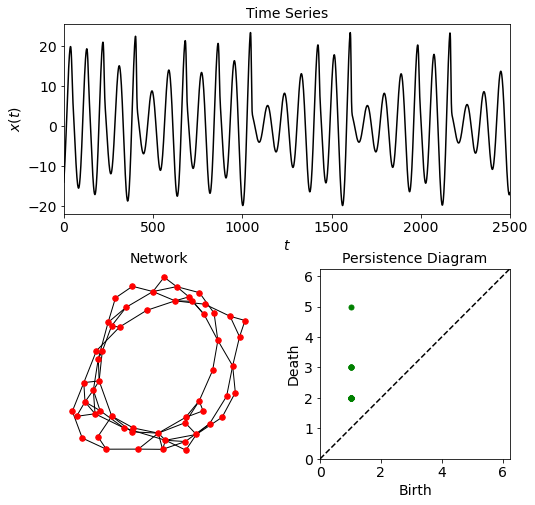

In [18]:
#import needed packages
import numpy as np
from teaspoon.SP.network import ordinal_partition_graph
from teaspoon.TDA.PHN import PH_network
from teaspoon.SP.network_tools import make_network
from teaspoon.parameter_selection.MsPE import MsPE_tau


#generate time series
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL
system = 'rossler'
dynamic_state = 'chaotic'
t, solution = DSL.DynamicSystems(system, dynamic_state)
ts = solution[0]


#Get appropriate dimension and delay parameters for permutations
tau = int(MsPE_tau(ts))
n = 5

#create adjacency matrix, this
A = ordinal_partition_graph(ts, n, tau)

#get networkx representation of network for plotting
G, pos = make_network(A, position_iterations = 1000, remove_deg_zero_nodes = True)

#create distance matrix and calculate persistence diagram
D, diagram = PH_network(A, method = 'unweighted', distance = 'shortest_path')
print('1-D Persistent Homology (loops): ', diagram[1])

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import networkx as nx

TextSize = 14
plt.figure(2)
plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(4, 2)

ax = plt.subplot(gs[0:2, 0:2]) #plot time series
plt.title('Time Series', size = TextSize)
plt.plot(ts, 'k')
plt.xticks(size = TextSize)
plt.yticks(size = TextSize)
plt.xlabel('$t$', size = TextSize)
plt.ylabel('$x(t)$', size = TextSize)
plt.xlim(0,len(ts))

ax = plt.subplot(gs[2:4, 0])
plt.title('Network', size = TextSize)
nx.draw(G, pos, with_labels=False, font_weight='bold', node_color='red',
        width=1, font_size = 10, node_size = 30)

ax = plt.subplot(gs[2:4, 1])
plt.title('Persistence Diagram', size = TextSize)
MS = 3
top = max(diagram[1].T[1])
plt.plot([0,top*1.25],[0,top*1.25],'k--')
plt.yticks( size = TextSize)
plt.xticks(size = TextSize)
plt.xlabel('Birth', size = TextSize)
plt.ylabel('Death', size = TextSize)
plt.plot(diagram[1].T[0],diagram[1].T[1] ,'go', markersize = MS+2)
plt.xlim(0,top*1.25)
plt.ylim(0,top*1.25)

plt.subplots_adjust(hspace= 0.8)
plt.subplots_adjust(wspace= 0.35)
plt.show()

### [Persistent Homology of k-NN Networks](http://elizabethmunch.com/code/teaspoon/network.html)

1-D Persistent Homology (loops):  [[ 1. 47.]]


<Figure size 432x288 with 0 Axes>

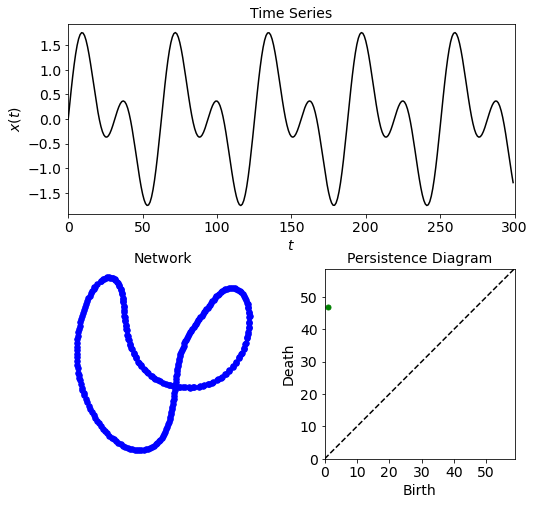

In [19]:
#import needed packages
import numpy as np
from teaspoon.SP.network import knn_graph
from teaspoon.TDA.PHN import PH_network
from teaspoon.SP.network_tools import make_network
from teaspoon.parameter_selection.MsPE import MsPE_tau

#generate a siple sinusoidal time series
t = np.linspace(0,30,300)
ts = np.sin(t) + np.sin(2*t)

#Get appropriate dimension and delay parameters for permutations
tau = int(MsPE_tau(ts))
n = 3

#create adjacency matrix, this
A = knn_graph(ts, n, tau, k = 4)

#get networkx representation of network for plotting
G, pos = make_network(A, position_iterations = 1000, remove_deg_zero_nodes = True)

#create distance matrix and calculate persistence diagram
D, diagram = PH_network(A, method = 'unweighted', distance = 'shortest_path')
print('1-D Persistent Homology (loops): ', diagram[1])

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import networkx as nx

TextSize = 14
plt.figure(2)
plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(4, 2)

ax = plt.subplot(gs[0:2, 0:2]) #plot time series
plt.title('Time Series', size = TextSize)
plt.plot(ts, 'k')
plt.xticks(size = TextSize)
plt.yticks(size = TextSize)
plt.xlabel('$t$', size = TextSize)
plt.ylabel('$x(t)$', size = TextSize)
plt.xlim(0,len(ts))

ax = plt.subplot(gs[2:4, 0])
plt.title('Network', size = TextSize)
nx.draw(G, pos, with_labels=False, font_weight='bold', node_color='blue',
        width=1, font_size = 10, node_size = 30)

ax = plt.subplot(gs[2:4, 1])
plt.title('Persistence Diagram', size = TextSize)
MS = 3
top = max(diagram[1].T[1])
plt.plot([0,top*1.25],[0,top*1.25],'k--')
plt.yticks( size = TextSize)
plt.xticks(size = TextSize)
plt.xlabel('Birth', size = TextSize)
plt.ylabel('Death', size = TextSize)
plt.plot(diagram[1].T[0],diagram[1].T[1] ,'go', markersize = MS+2)
plt.xlim(0,top*1.25)
plt.ylim(0,top*1.25)

plt.subplots_adjust(hspace= 0.8)
plt.subplots_adjust(wspace= 0.35)
plt.show()

----
---

## 5. [Machine Learning Module](http://elizabethmunch.com/code/teaspoon/ML.html)
<br />
<div align="center"> 
 <img src="figures/ML_fig.png" style="width:300px;">
</div>

### [Featurization](http://elizabethmunch.com/code/teaspoon/F_PD.html)

**Persistent Landscapes**

Generating torus clouds...
Generating annuli clouds...


C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWa

C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWa

Generating cube clouds...
Generating three cluster clouds...


C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWa

C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWa

Generating three clusters of three clusters clouds...
Generating sphere clouds...


C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWa

Finished generating clouds and computing persistence.

18


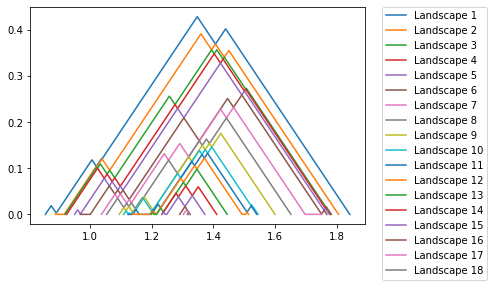

In [20]:
from teaspoon.ML.feature_functions import PLandscape
from teaspoon.MakeData.PointCloud import testSetManifolds
# generate persistence diagrams
df = testSetManifolds(numDgms = 50, numPts = 100)
Diagrams_H1 = df['Dgm1']
# Compute the persistence landscapes
PLC = PLandscape(Diagrams_H1[0])
print(PLC.PL_number)
fig = PLC.PLandscape_plot(PLC.AllPL['Points'])  

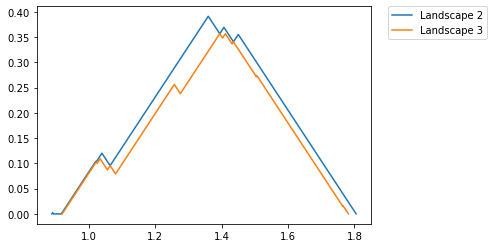

In [21]:
PLC  = PLandscape(Diagrams_H1[0],[2,3])
fig = PLC.PLandscape_plot(PLC.AllPL['Points'],[2,3])  

**Persistence Images**

Images are computed using [PersistenceImages](https://gitlab.com/csu-tda/PersistenceImages) package.

Generating torus clouds...
Generating annuli clouds...


C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWa

C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWa

Generating cube clouds...
Generating three cluster clouds...


C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWa

C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWa

Generating three clusters of three clusters clouds...
Generating sphere clouds...


C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWa

Finished generating clouds and computing persistence.



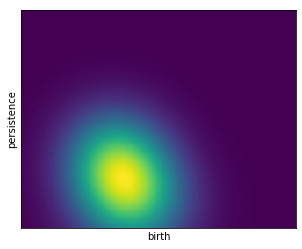

<Figure size 432x288 with 0 Axes>

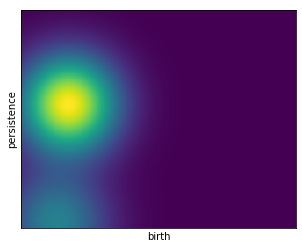

<Figure size 432x288 with 0 Axes>

In [22]:
import teaspoon.ML.feature_functions as Ff
from teaspoon.MakeData.PointCloud import testSetManifolds

# generate persistence diagrams
df = testSetManifolds(numDgms = 50, numPts = 100)
Diagrams_H1= df['Dgm1'].sort_index().values

TF_Learning = False
D_Img=[1,75]
plot=False
feature_PI = Ff.F_Image(Diagrams_H1,0.01,0.15,plot,TF_Learning, D_Img)
# if user wants to plot images
plot=True
feature_PI = Ff.F_Image(Diagrams_H1,0.01,0.15,plot,TF_Learning, D_Img)
fig = feature_PI['figures']

**Carlsson Coordinates**

In [23]:
import teaspoon.ML.feature_functions as Ff
from teaspoon.MakeData.PointCloud import testSetManifolds
# generate persistence diagrams
df = testSetManifolds(numDgms = 50, numPts = 100)
Diagrams_H1= df['Dgm1'].sort_index().values
FN=3
FeatureMatrix,TotalNumComb,CombList = Ff.F_CCoordinates(Diagrams_H1,FN)
print(TotalNumComb)

Generating torus clouds...
Generating annuli clouds...


C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWa

C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWa

Generating cube clouds...
Generating three cluster clouds...


C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWa

C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWa

Generating three clusters of three clusters clouds...
Generating sphere clouds...


C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWa

Finished generating clouds and computing persistence.

7


**Path Signatures**

In [24]:
import numpy as np
import teaspoon.ML.feature_functions as Ff
from teaspoon.ML.feature_functions import PLandscape
from teaspoon.MakeData.PointCloud import testSetManifolds
# generate persistence diagrams
df = testSetManifolds(numDgms = 1, numPts = 100)
Diagrams_H1= df['Dgm1'].sort_index().values
#compute persistence landscapes
PerLand=np.ndarray(shape=(6),dtype=object)
for i in range(0, 6):
    Land=PLandscape(Diagrams_H1[i])
    PerLand[i]=Land.AllPL
#choose landscape number for which feature matrix will be computed
L_number = [2]
#compute feature matrix
feature_PS = Ff.F_PSignature(PerLand,L_number)

Generating torus clouds...
Generating annuli clouds...
Generating cube clouds...
Generating three cluster clouds...
Generating three clusters of three clusters clouds...
Generating sphere clouds...
Finished generating clouds and computing persistence.



C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
C:\Users\myersau3.EGR\AppData\Local\Continuum\anaconda3\lib\site-packages\teaspoon\TDA\..\..\pandas\core\internals\blocks.py:867: VisibleDeprecationWa

KeyboardInterrupt: 

**Kernel Method**

In [ ]:
import teaspoon.ML.feature_functions as Ff
from teaspoon.MakeData.PointCloud import testSetManifolds
# generate persistence diagrams
df = testSetManifolds(numDgms = 1, numPts = 100)
Diagrams_H1 = df['Dgm1']
#compute kernel between two persistence diagram
sigma=0.25
kernel = Ff.KernelMethod(Diagrams_H1[0], Diagrams_H1[1], sigma)
print(kernel)

### [Classification](http://elizabethmunch.com/code/teaspoon/CL.html)

**Persistent Landscapes**

In [ ]:
import numpy as np
from teaspoon.ML.feature_functions import PLandscape
import teaspoon.ML.PD_Classification as PD_CL
from teaspoon.ML.Base import LandscapesParameterBucket
from teaspoon.MakeData.PointCloud import testSetManifolds
from sklearn.svm import SVC
# generate persistence diagrams
df = testSetManifolds(numDgms = 10, numPts = 100)
Diagrams_H1= df['Dgm1'].sort_index().values
Labels = df['trainingLabel'].sort_index().values
#parameters for classification
params = LandscapesParameterBucket()
params.clf_model = SVC
params.test_size = 0.33
params.Labels = Labels
params.PL_Number = [1,2,3,4,5,6,7,8]
print(params)
# Compute the persistence landscapes
PerLand=np.ndarray(shape=(60),dtype=object)
for i in range(0, 60):
    Land=PLandscape(Diagrams_H1[i])
    PerLand[i]=Land.AllPL
# Perform classification
result = PD_CL.CL_PL(PerLand,params)

**Persistence Images**

In [19]:
import numpy as np
import teaspoon.ML.feature_functions as Ff
import teaspoon.ML.PD_Classification as CL_PD
from teaspoon.ML.Base import CL_ParameterBucket
from teaspoon.MakeData.PointCloud import testSetManifolds
from sklearn.svm import SVC
# generate two sets of persistence diagrams
df_1 = testSetManifolds(numDgms = 10, numPts = 100)
df_2 = testSetManifolds(numDgms = 10, numPts = 100)
Diagrams_H1_1= df_1['Dgm1'].sort_index().values
Diagrams_H1_2= df_2['Dgm1'].sort_index().values
Labels_1 = df_1['trainingLabel'].sort_index().values
Labels_2 = df_2['trainingLabel'].sort_index().values
# classification without using transfer learning
TF_Learning = False
plot = False
D_Img=[]
#classification parameters
params = CL_ParameterBucket()
params.clf_model = SVC
params.test_size =0.33
params.Labels = Labels_1
print(params)
F_Images =Ff.F_Image(Diagrams_H1_1,0.1,0.10,plot,TF_Learning,D_Img)
results = CL_PD.CL_PI(F_Images['F_Matrix'],params)

Generating torus clouds...
Generating annuli clouds...
Generating cube clouds...
Generating three cluster clouds...
Generating three clusters of three clusters clouds...
Generating sphere clouds...
Finished generating clouds and computing persistence.

Generating torus clouds...
Generating annuli clouds...
Generating cube clouds...
Generating three cluster clouds...
Generating three clusters of three clusters clouds...
Generating sphere clouds...
Finished generating clouds and computing persistence.

Variables in parameter bucket
-----------------------------
clf_model : <class 'sklearn.svm._classes.SVC'>
test_size : 0.33
TF_Learning : False
-----------------------------

Test set score: 0.7
Test set deviation: 0.1341640786499874
Training set score: 0.7375
Training set deviation: 0.07180703308172535
Total elapsed time: 0.12569069862365723


Classification using transfer learning

In [20]:
TF_Learning =True
F_Images_2 = Ff.F_Image(Diagrams_H1_1,0.1,0.10,plot,TF_Learning,D_Img,Diagrams_H1_2)
params = CL_ParameterBucket()
params.clf_model = SVC
params.test_size =0.33
params.training_labels = Labels_1
params.test_labels = Labels_2
params.TF_Learning  = True
print(params)
results = CL_PD.CL_PI(F_Images_2['F_train'],params,F_Images_2['F_test'])

Variables in parameter bucket
-----------------------------
clf_model : <class 'sklearn.svm._classes.SVC'>
test_size : 0.33
TF_Learning : True
-----------------------------

Test set score: 0.7452380952380953
Test set deviation: 0.08319716766502926
Training set score: 0.7749999999999999
Training set deviation: 0.09354143466934851
Total elapsed time: 0.06116914749145508


**Carlsson Coordinates**

In [21]:
import numpy as np
import teaspoon.ML.feature_functions as Ff
import teaspoon.ML.PD_Classification as CL_PD
from teaspoon.ML.Base import CL_ParameterBucket
from teaspoon.MakeData.PointCloud import testSetManifolds
from sklearn.svm import SVC
# generate two sets of persistence diagrams
df_1 = testSetManifolds(numDgms = 10, numPts = 100)
df_2 = testSetManifolds(numDgms = 10, numPts = 100)
Diagrams_H1_1= df_1['Dgm1'].sort_index().values
Diagrams_H1_2= df_2['Dgm1'].sort_index().values
# labels
Labels_1 = df_1['trainingLabel'].sort_index().values
Labels_2 = df_2['trainingLabel'].sort_index().values
# parameters used in classification without transfer learning
params = CL_ParameterBucket()
params.clf_model = SVC
params.test_size =0.33
params.Labels = Labels_1
params.TF_Learning =False
params.FN = 5
print(params)
results = CL_PD.CL_CC(Diagrams_H1_1,params)

Generating torus clouds...
Generating annuli clouds...
Generating cube clouds...
Generating three cluster clouds...
Generating three clusters of three clusters clouds...
Generating sphere clouds...
Finished generating clouds and computing persistence.

Generating torus clouds...
Generating annuli clouds...
Generating cube clouds...
Generating three cluster clouds...
Generating three clusters of three clusters clouds...
Generating sphere clouds...
Finished generating clouds and computing persistence.

Variables in parameter bucket
-----------------------------
clf_model : <class 'sklearn.svm._classes.SVC'>
test_size : 0.33
TF_Learning : False
FN : 5
-----------------------------

Number of combinations: 31
Highest accuracy among all combinations:
Test set score: 0.6499999999999999
Test set deviation: 0.0806225774829855
Training set score: 0.8
Training set deviation: 0.0370809924354783
Total elapsed time: 0.45887327194213867


Classification using transfer learning

In [22]:
# parameters used in classification with transfer learning
params = CL_ParameterBucket()
params.clf_model = SVC
params.test_size =0.33
params.training_labels = Labels_1
params.test_labels = Labels_2
params.TF_Learning =True
params.FN = 5
print(params)
results = CL_PD.CL_CC(Diagrams_H1_1,params,Diagrams_H1_2)

Variables in parameter bucket
-----------------------------
clf_model : <class 'sklearn.svm._classes.SVC'>
test_size : 0.33
TF_Learning : True
FN : 5
-----------------------------

Number of combinations: 31
Highest accuracy among all combinations:
Test set score: 0.7428571428571429
Test set deviation: 0.08234103078947896
Training set score: 0.735
Training set deviation: 0.05267826876426368
Total elapsed time: 0.34015393257141113


**Kernel Method**

In [23]:
import numpy as np
import teaspoon.ML.feature_functions as Ff
from teaspoon.ML.PD_Classification import CL_KM
from teaspoon.ML.Base import CL_ParameterBucket
from teaspoon.MakeData.PointCloud import testSetManifolds
# generate two sets of persistence diagrams
df_1 = testSetManifolds(numDgms = 5, numPts = 100)
Diagrams_H1_1= df_1['Dgm1'].sort_index().values
Labels_1 = df_1['trainingLabel'].sort_index().values
#convert string labels into integers ones
Labels_ = np.zeros((len(Diagrams_H1_1)))
for i in range(len(Diagrams_H1_1)):
    if Labels_1[i]=='Torus':
        Labels_[i]=0
    elif Labels_1[i]=='Annulus':
        Labels_[i]=1
    elif Labels_1[i]=='Cube':
        Labels_[i]=2
    elif Labels_1[i]=='3Cluster':
        Labels_[i]=3
    elif Labels_1[i]=='3Clusters of 3Clusters':
        Labels_[i]=4
    elif Labels_1[i]=='Sphere':
        Labels_[i]=5
params = CL_ParameterBucket()
params.test_size =0.33
params.Labels = Labels_
params.sigma = 0.25
results = CL_KM(Diagrams_H1_1,params)

Generating torus clouds...
Generating annuli clouds...
Generating cube clouds...
Generating three cluster clouds...
Generating three clusters of three clusters clouds...
Generating sphere clouds...
Finished generating clouds and computing persistence.

Enter the path of the LIBSVM python folder: C:\Users\melih\Desktop\libsvm-3.24\python
Accuracy = 10% (1/10) (classification)
Accuracy = 50% (5/10) (classification)
Accuracy = 20% (2/10) (classification)
Test set score: 26.666666666666668
Test set deviation: 16.996731711975947
Total elapsed time: 26.666666666666668


In [25]:
import warnings
warnings.filterwarnings('ignore')